In [2]:
from notebook.services.config import ConfigManager
cfgm = ConfigManager()
cfgm.update('livereveal', {
              'theme': 'simple',
              'transition': 'convex',
              'start_slideshow_at': 'selected'
})


{'start_slideshow_at': 'selected', 'theme': 'simple', 'transition': 'convex'}

# Python Analysis Evaluation
Author: Barron H. Henderson

In [3]:
# Prepare my slides
%pylab inline
%cd working

Populating the interactive namespace from numpy and matplotlib
/Users/barronh/Downloads/GCandPython/working


# Process AQS for evaluation

1. Download annual zip file(s)
2. Unzip
3. Use sed, grep, or awk to get spatial/temporal subset
4. Reshape data
    1. Missing data should be masked
    2. Dimensions (time, point)
    

# CHECK POINT 

1. What do you think the dimensions should be for AQS observations?
    - 

2. What meta-data should be present?
    - 
    

# Getting AQS Observations

1. Get AQS observations
    1. Raw outputs from AQS website
    2. Representational State Transfer - good for small amounts of data
2. REST format was having problems due to its transition.

# Raw outputs

1. Download directly or download inline

In [5]:
!pncaqsraw4pnceval.py --help

usage: pncaqsraw4pnceval.py [-h] [--sampleval SAMPLEVAL]
                            [--timeresolution {daily,hourly}]
                            -s BDATE -e EDATE [-r RDATE]
                            [--param [PARAM]]
                            (--gridcro2d GRIDCRO2D | --wktpolygon WKTPOLYGON)
                            [-o [OUTPATH]] [-O]

Converts AQS Raw Hourly files for comparison with pncgen
--extract files. Example Workflow: $ %s --start-date=2006-08-01
--end-date=2012-08-01 --param=44201 GRIDCRO2D_Benchmark $
pncdump --header AQS_DATA_20060801-20060801.nc | grep
lonlatcoords :lonlatcoords =
"-87.881412,30.498001/-85.802182,33.281261/..." ; $ pncgen -s
LAY,0 --extract="-87.881412,30.498001/-85.802182,33.281261/..."
CCTM_V5g_par_Linux2_x86_64gfort.ACONC.CMAQ-BENCHMARK_20060801
Benchmark_20060801-20060801.nc $ pnceval
AQS_DATA_20060801-20060801.nc Benchmark_20060801-20060801.nc

optional arguments:
  -h, --help            show this help message and exit
  --sampleval SAMPLEVA

# wktpolygon

This option is most relevant for regional extractions.

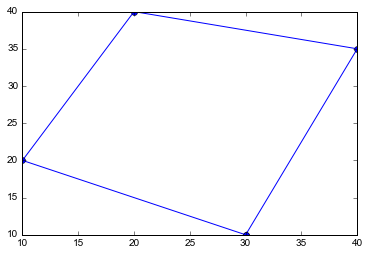

In [6]:
from shapely.wkt import loads
geom = loads("POLYGON ((30 10, 40 35, 20 40, 10 20, 30 10))")
x, y = geom.exterior.xy
plt.plot(x, y, ls = '-', marker = 'o')

# CHECK  POINT

What should the bounding box be as a WKT Polygon?

# ANSWERS Hidden

<div style="visibility: hidden">

"POLYGON ((llcrnrlon llcrnrlat, lrcrnrlon lrcrnrlat, urcrnrlon urcrnrlat, ulcrnrlon ulcrnrlat, llcrnrlon llcrnrlat))"

</div>

# Download and Process

In [8]:
!pncaqsraw4pnceval.py -O --timeresolution=daily \
    --start-date 2013-05-01 --end-date 2013-07-01 \
    --wktpolygon "POLYGON ((-181.25 0, 178.75 0, 178.75 90, -181.25 90, -181.25 0))"

Reading daily_44201_2013.csv
Concatenating files
Creating output file
Processing data rows
   0%   1%   3%   4%   6%   8%   9%  11%  12%  14%  16%  17%  19%  20%  22%  24%  25%  27%  29%  30%  32%  33%  35%  37%  38%  40%  41%  43%  45%  46%  48%  50%  51%  53%  54%  56%  58%  59%  61%  62%  64%  66%  67%  69%  70%  72%  74%  75%  77%  79%  80%  82%  83%  85%  87%  88%  90%  91%  93%  95%  96%  98%
Writing to disk
Successful


In [9]:
%ls -l AQS_DATA_20130501-20130701.nc

-rw-r--r-- 1 barronh 387658 Jul 15 21:11 AQS_DATA_20130501-20130701.nc


# Review Output

In [10]:
!pncdump.py --header AQS_DATA_20130501-20130701.nc

netCDF4._netCDF4.Dataset AQS_DATA_20130501-20130701.nc {
dimensions:
        time = UNLIMITED // (62 currently) 
        LAY = 1 ;
        points = 1295 ;

variables:
        float latitude(points);
                latitude:units = "degrees_north" ;
                latitude:standard_name = "latitude" ;
        float longitude(points);
                longitude:units = "degrees_east" ;
                longitude:standard_name = "longitude" ;
        float Ozone(time, LAY, points);
                Ozone:_FillValue = -999.0 ;
                Ozone:units = "Parts per million" ;
                Ozone:standard_name = "Ozone" ;
        float time(time);
                time:units = "days since 1900-01-01" ;
                time:standard_name = "time" ;


// global properties:
                :SITENAMES = "010030010;010331002;010499991;010510001;010550011;010690004;010730023;010731003;010731005;010731010;010732006;010735003;010736002;010890014;010890022;010970003;010972005;011011002;011030011;0

# Extract GEOS-Chem at AQS

In [11]:
!pncgen -O -f "bpch,vertgrid='GEOS-5-NATIVE',nogroup=('IJ-AVG-$',)" \
        --extract-file AQS_DATA_20130501-20130701.nc --stack=time -v O3 -s layer72,0 \
        bpch/ctm.bpch.v10-01-public-Run0.2013050100 \
        bpch/ctm.bpch.v10-01-public-Run0.2013050100 \
        bpch_aqs_extract.nc

**PNC:/Users/barronh/Development/pseudonetcdf/src/PseudoNetCDF/core/_functions.py:831:UserWarning:
  Got duplicate variables for layer72 without stackable dimension; first value retained


In [12]:
!pncdump.py --header bpch_aqs_extract.nc

netCDF4._netCDF4.Dataset bpch_aqs_extract.nc {
dimensions:
        time = 2 ;
        layer72 = 1 ;
        latitude = 46 ;
        longitude = 72 ;
        layer = 72 ;
        layer_bounds = 73 ;
        tnv = 2 ;
        nv = 2 ;
        points = 1295 ;

variables:
        float O3(time, layer72, points);
                O3:coordinates = "time layer72 latitude longitude" ;
                O3:category = "IJ-AVG-$" ;
                O3:carbon = 1 ;
                O3:kgpermole = 0.048000000000000001 ;
                O3:units = "ppbv" ;
                O3:standard_name = "O3" ;
                O3:grid_mapping = "crs" ;
                O3:scale = True ;
                O3:base_units = "                                        " ;
                O3:reserved = "                                        " ;
                O3:tracerid = 2 ;
                O3:var_desc = "O3" ;
                O3:long_name = "O3" ;
        double time(time);
                time:base_units = "hours since 198

In [13]:
!pnceval.py --help

usage: pnceval.py [-h] [--verbose] [--pnc PNC]
                  [-f {see --list-formats for choices}]
                  [--list-format] [--help-format HELPFORMAT]
                  [--sep] [--inherit] [--mangle]
                  [--rename RENAME]
                  [--remove-singleton REMOVESINGLETON]
                  [--coordkeys key1,key2]
                  [-v varname1[,varname2[,...,varnameN]]
                  [-a att_nm,var_nm,mode,att_typ,att_val]
                  [-m MASKS] [--from-convention FROMCONV]
                  [--to-convention TOCONV] [--stack STACK]
                  [--merge] [-s dim,start[,stop[,step]]]
                  [-r dim,function[,weight]]
                  [--mesh dim,weight,function]
                  [-c dim,mode,wgt1,wgt2,...wgtN] [-e EXTRACT]
                  [--extract-file EXTRACTFILE]
                  [--extractmethod {nn,linear,cubic,quintic,KDTree}]
                  [--op-typ OPERATORS] [--expr EXPRESSIONS]
                  [--exprscript EX

In [14]:
%%bash
pnceval.py --funcs NO,NP,NOP,MO,MP,MB,RMSE,IOA,AC -v O3 \
--pnc " --expr O3=Ozone*1000;O3.units=\'ppb\' -r time,mean AQS_DATA_20130501-20130701.nc" \
--pnc " -r time,mean bpch_aqs_extract.nc"

AQS_DA_0 = ifile0 = AQS_DATA_20130501-20130701.nc
bpch_a_0 = ifile1 = bpch_aqs_extract.nc
2013-05-31 12:00:00,2013-05-31 12:00:00,O3,N Observations (#),NO,1295.000000
2013-05-31 12:00:00,2013-05-31 12:00:00,O3,N Predictions (#),NP,1295.000000
2013-05-31 12:00:00,2013-05-31 12:00:00,O3,N Observations/Prediction Pairs (#),NOP,1295.000000
2013-05-31 12:00:00,2013-05-31 12:00:00,O3,Mean Observations (obs unit),MO,34.267725
2013-05-31 12:00:00,2013-05-31 12:00:00,O3,Mean Predictions (model unit),MP,43.995331
2013-05-31 12:00:00,2013-05-31 12:00:00,O3,Mean Bias,MB,9.727605
2013-05-31 12:00:00,2013-05-31 12:00:00,O3,Root Mean Square Error (model unit),RMSE,11.633646
2013-05-31 12:00:00,2013-05-31 12:00:00,O3,Index of Agreement, IOA,IOA,0.502660
2013-05-31 12:00:00,2013-05-31 12:00:00,O3,Anomaly Correlation,AC,0.146968


**PNC:/Users/barronh/Development/pseudonetcdf/src/PseudoNetCDF/pnceval.py:371:UserWarning:
  Assumes input order is obs model


In [15]:
from PseudoNetCDF import pnceval
help(pnceval)

Help on module PseudoNetCDF.pnceval in PseudoNetCDF:

NAME
    PseudoNetCDF.pnceval

FUNCTIONS
    AC(obs, mod, axis=None)
        Anomaly Correlation
    
    E1(obs, mod, axis=None)
        Modified Coefficient of Efficiency, E1
    
    FB(obs, mod, axis=None)
        Fractional Bias (%)
    
    FE(obs, mod, axis=None)
        Fractional Error (%)
    
    IOA(obs, mod, axis=None)
        Index of Agreement, IOA
    
    MB(obs, mod, axis=None)
        Mean Bias
    
    ME(obs, mod, axis=None)
        Mean Gross Error (model and obs unit)
    
    MNB(obs, mod, axis=None)
        Mean Normalized Bias (%)
    
    MNE(obs, mod, axis=None)
        Mean Normalized Gross Error (%)
    
    MO(obs, mod, axis=None)
        Mean Observations (obs unit)
    
    MP(obs, mod, axis=None)
        Mean Predictions (model unit)
    
    MdnB(obs, mod, axis=None)
        Median Bias
    
    MdnE(obs, mod, axis=None)
        Median Gross Error (model and obs unit)
    
    MdnNB(obs, mod, axis=

# Reproduced in Python

1. Read in files
2. Get variables
3. Calculate MB, RMSE
4. Modify
    - Repeat except for month specific results
    - Repeat except for site specific results



# Reproduction Provided

In [16]:
from PseudoNetCDF import PNC, pnceval

aqs = PNC("--reduce=time,mean", "--expr=O3=Ozone*1000", "AQS_DATA_20130501-20130701.nc")
geos = PNC("--reduce=time,mean", "bpch_aqs_extract.nc")
aqso3 = aqs.ifiles[0].variables['O3']
geoso3 = geos.ifiles[0].variables['O3']
print(aqso3.shape)
print(geoso3.shape)
print(pnceval.RMSE(aqso3, geoso3))

(1, 1, 1295)
(1, 1, 1295)
11.63364572321664


# ANSWERS Hidden

<div style="visibility: hidden">

```
from PseudoNetCDF import PNC, pnceval

aqs = PNC("--expr=O3=Ozone*1000", "AQS_DATA_20130501-20130701.nc")
geos = PNC("bpch_aqs_extract.nc")
aqso3 = aqs.ifiles[0].variables['O3'].reshape(2, 31, 1, 1295).mean(1)
geoso3 = geos.ifiles[0].variables['O3']
print(aqso3.shape)
print(geoso3.shape)
print(pnceval.RMSE(aqso3, geoso3, axis = 2))
```
</div>